### **Connected with Drive**

In [ ]:
# Mount dataset from drive into google Collab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=5767b0d78f3593c1ebe23940eaf3b9906e428dcace4cbcc8ef7760396a499629
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


### **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from fitter import Fitter

### **Load Dataset**

In [ ]:
# Read dataset from drive
df = pd.read_csv('/content/drive/MyDrive/labkcb6/Galaxy_4.csv')
df

,i,z,class
0,19.16573,18.79371,GALAXY
1,21.16812,21.61427,GALAXY
2,19.34857,18.94827,GALAXY
3,20.50454,19.25010,GALAXY
4,15.97711,15.54461,GALAXY
...,...,...,...
99995,21.30548,20.73569,GALAXY
99996,19.75759,19.41526,GALAXY
99997,17.69034,17.35221,GALAXY
99998,19.07254,18.62482,GALAXY


### **DATA CLEANING**

---



In [ ]:
# untuk melihat null dari valuenya
df.isnull().sum()

i        0
z        0
class    0
dtype: int64

### **DATA WRANGLING**
---



In [ ]:
df.shape

(100000, 3)

In [ ]:
# Type Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   i       100000 non-null  float64
 1   z       100000 non-null  float64
 2   class   100000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [ ]:
# Change Dataset Type
df['class'] = df['class'].astype('category')
df['i'] = df.i.astype('float64')
df['z'] = df.z.astype('float64')
df.dtypes

i         float64
z         float64
class    category
dtype: object

In [ ]:
# Check Type Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   i       100000 non-null  float64 
 1   z       100000 non-null  float64 
 2   class   100000 non-null  category
dtypes: category(1), float64(2)
memory usage: 1.6 MB


In [ ]:
df['class'].unique()

['GALAXY', 'QSO', 'STAR']
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

In [ ]:
# Change Lable to Numeric
classp= pd.get_dummies(df['class'])
classp

,GALAXY,QSO,STAR
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
99995,1,0,0
99996,1,0,0
99997,1,0,0
99998,1,0,0


In [ ]:
# Collab with concat()
df=pd.concat([df,classp],axis=1)
df

,i,z,class,GALAXY,QSO,STAR
0,19.16573,18.79371,GALAXY,1,0,0
1,21.16812,21.61427,GALAXY,1,0,0
2,19.34857,18.94827,GALAXY,1,0,0
3,20.50454,19.25010,GALAXY,1,0,0
4,15.97711,15.54461,GALAXY,1,0,0
...,...,...,...,...,...,...
99995,21.30548,20.73569,GALAXY,1,0,0
99996,19.75759,19.41526,GALAXY,1,0,0
99997,17.69034,17.35221,GALAXY,1,0,0
99998,19.07254,18.62482,GALAXY,1,0,0


### **Data Visualization**

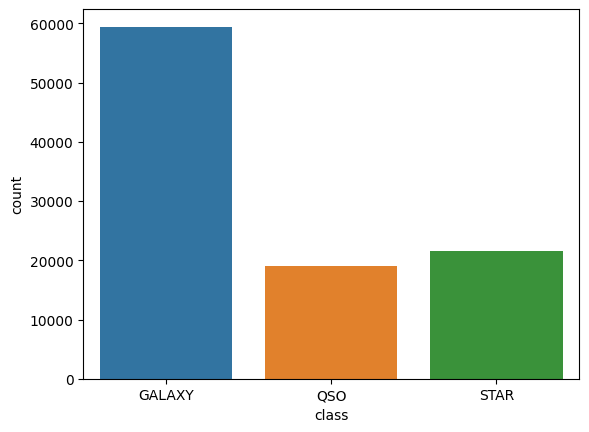

In [ ]:
# visualization with chart
sns.countplot(x='class',data=df)
plt.show()

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 99.26it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
class,inf,inf,inf,inf,NaN,NaN


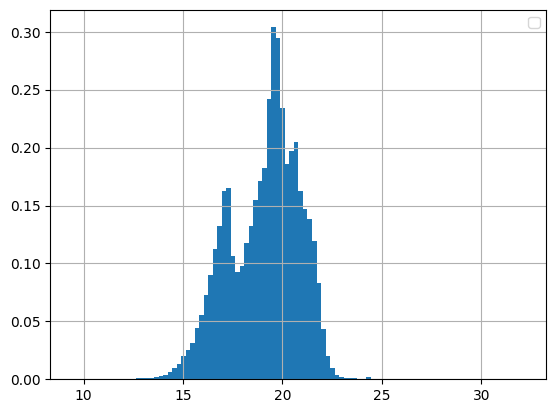

In [ ]:
test = Fitter(df['i'], distributions = ['class'])
test.fit()
test.summary()

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 92.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
class,inf,inf,inf,inf,NaN,NaN


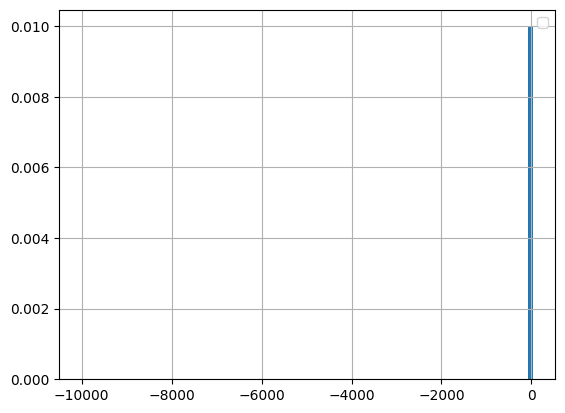

In [ ]:
test = Fitter(df['z'], distributions = ['class'])
test.fit()
test.summary()

### **Model Creation and Training**


---



In [ ]:
df

,i,z,class,GALAXY,QSO,STAR
0,19.16573,18.79371,GALAXY,1,0,0
1,21.16812,21.61427,GALAXY,1,0,0
2,19.34857,18.94827,GALAXY,1,0,0
3,20.50454,19.25010,GALAXY,1,0,0
4,15.97711,15.54461,GALAXY,1,0,0
...,...,...,...,...,...,...
99995,21.30548,20.73569,GALAXY,1,0,0
99996,19.75759,19.41526,GALAXY,1,0,0
99997,17.69034,17.35221,GALAXY,1,0,0
99998,19.07254,18.62482,GALAXY,1,0,0


In [ ]:
df.drop(['GALAXY','STAR','QSO'],axis=1,inplace=True)
df

,i,z,class
0,19.16573,18.79371,GALAXY
1,21.16812,21.61427,GALAXY
2,19.34857,18.94827,GALAXY
3,20.50454,19.25010,GALAXY
4,15.97711,15.54461,GALAXY
...,...,...,...
99995,21.30548,20.73569,GALAXY
99996,19.75759,19.41526,GALAXY
99997,17.69034,17.35221,GALAXY
99998,19.07254,18.62482,GALAXY


In [ ]:
X=df.drop('class', axis=1)
y=df['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# Numeric with defined by random
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Compare Actual Status with Predict
y_pred=model.predict(X_test)
df1=pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred})
df1

,Actual Status,Predicted Status
43660,GALAXY,GALAXY
87278,GALAXY,GALAXY
14317,GALAXY,QSO
81932,QSO,GALAXY
95321,GALAXY,GALAXY
...,...,...
994,GALAXY,GALAXY
42287,GALAXY,GALAXY
4967,STAR,GALAXY
47725,QSO,GALAXY


### **Model Evaluation**

---



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.69      0.78      0.73     17821
         QSO       0.43      0.72      0.54      5725
        STAR       0.18      0.00      0.01      6454

    accuracy                           0.60     30000
   macro avg       0.43      0.50      0.43     30000
weighted avg       0.53      0.60      0.54     30000



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[13988  3760    73]
 [ 1618  4104     3]
 [ 4797  1640    17]]


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

60.36333333333334
